In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx

[[0. 1. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
At step    0 logliklihood is -540.4866
At step    1 logliklihood is -522.3746
At step    2 logliklihood is -510.3349
At step    3 logliklihood is -501.3463
At step    4 logliklihood is -494.4433
At step    5 logliklihood is -489.0723
At step    6 logliklihood is -484.8587
At step    7 logliklihood is -481.5274
At step    8 logliklihood is -478.8686
At step    9 logliklihood is -476.7215
At step   10 logliklihood is -474.9633
At step   11 logliklihood is -473.5012
At step   12 logliklihood is -472.2657
At step   13 logliklihood is -471.2068
At step   14 logliklihood is -470.2843
At step   15 logliklihood is -469.4684
At step   16 logliklihood is -468.7366
At step   17 logliklihood is -468.0714
At step   18 logliklihood is -467.4594
At step   19 logliklihood is -466.8898
At step   20 logliklihood is -466.3556
At step   21 logliklihood

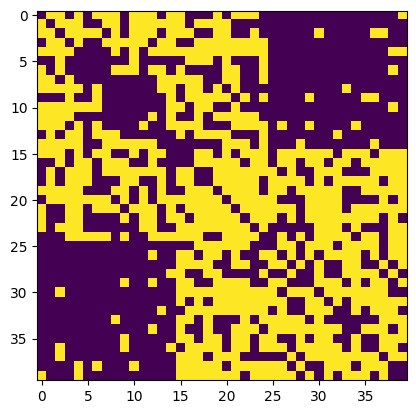

In [2]:
def log_likelihood(F, A):
    # todo
    log_likelihood = 0
    N = A.shape[0]
    for i in range(N):
        for j in range(i + 1, N):
            f = np.multiply(F[i], F[j])
            sum_f = np.multiply(np.sum(f), -1)
            #print(sum_f)
            d = A[i][j]
            #print("!! ", A[i][j])
            multiply = d + ((-1) ** d) * math.exp(sum_f)
            #print("multiply ", multiply)
            log_likelihood += math.log(multiply)
            #print("log ", log_likelihood)
    return log_likelihood


def gradient(F, A, u):
    # todo gradient of log_likelihood respect to person i parameters (F_ic)
    grad = []
    N = A.shape[0]
    C = len(F[0])
    for t in range(C):
        g = 0
        for v in range(N):
            f = np.multiply(F[u], F[v])
            sum_f = np.multiply(np.sum(f), -1)
            d = A[u][v]
            multiply = ((-1) ** d) * math.exp(sum_f)
            numerator = np.multiply(multiply, -F[v][t])
            denominator = d + multiply
            g += numerator/denominator
        grad.append(g)

    return grad


def train(A, C, iterations=200):
    # initialize an F
    N = A.shape[0]
    F = np.random.rand(N, C)

    for n in range(iterations):
        for person in range(N):
            grad = np.array(gradient(F, A, person))
            # print(grad)
            # print(type(grad))
            F[person] += 0.005 * grad  # updating F
            F[person] = np.maximum(0.001, F[person])  # F should be nonnegative
        ll = log_likelihood(F, A)
        print('At step %4i logliklihood is %5.4f' % (n, ll))

    return F


A = np.random.rand(40, 40)
A[0:15, 0:25] = A[0:15, 0:25] > 1 - 0.6  # connection prob people with 1 common group
A[0:15, 25:40] = A[0:15,25:40] > 1 - 0.1  # connection prob people with no common group
A[15:40,25:40]=A[15:40,25:40]>1-0.7 # connection prob people with 1 common group
A[15:25, 15:25] = A[15:25, 15:25] > 1 - 0.8  # connection prob people with 2 common group
for i in range(40):
    A[i, i] = 0
    for j in range(i):
        A[i, j] = A[j, i]

plt.imshow(A)
delta = np.sqrt(-np.log(1 - 0.1))  # epsilon=0.1
print(A)
F = train(A, 2)
for i in range(A.shape[0]):
    print(i)
    print(F[i] > delta)
